# Federico Campanozzi - Progetto Data Intensive con Relazione
                                                                                                             a.a. 2021/2022

## 1 - Descrizione del problema

Il problema è determinare se una transazione è fraudolenta oppure no.

### 1.1 - Descrizione del Dataset

Le colonne del dataset sono così definite : 
- step: rappresenta un'unita di tempo 1 = 1 ora
- type: tipo di transazione
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction
- isFlaggedFraud : il risultato del modello predittivo

## 2- Analisi esplorativa

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
transactions = pd.read_csv("../data/data.csv")
transactions[:10]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


Estraiamo dal dataframe tutte le informazioni statistiche e gli aggiungiamo anche altre due informazione
che possono essere utili per capire la distribuzione dei dati, ovvero il numero di valori distinti e il numero
di valori nulli.

In [5]:
vMtx = transactions.describe().values
vMtx = np.vstack([vMtx, [len(transactions[c].unique()) for c in ["step","amount","oldbalanceOrg",
                                                                 "newbalanceOrig","oldbalanceDest","newbalanceDest",
                                                                 "isFraud","isFlaggedFraud"]]])
vMtx = np.vstack([vMtx, transactions.describe().isna().sum().values])
pd.DataFrame(data=vMtx,
             index=['count','mean','std','min','25%','50%','75%','max','valori distinti','valori nulli'],
             columns=transactions.describe().columns)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00
valori distinti,7.430000e+02,5.316900e+06,1.845844e+06,2.682586e+06,3.614697e+06,3.555499e+06,2.000000e+00,2.000000e+00
valori nulli,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


### 2.1 - Grafici

Ho creato dei grafici per le transazioni fraudolente per far capire (graficamente) quanto il numero di istanze
siano differenti e quanto il tipo di transazione (colonna "type") incida.

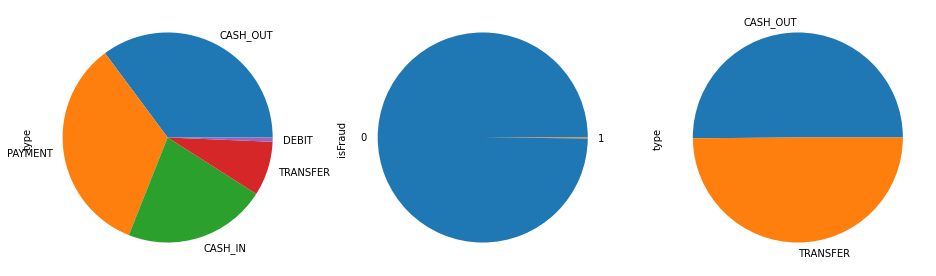

In [6]:
plt.figure(figsize=(16, 10))
transactions["type"].value_counts().plot.pie(ax=plt.subplot(1, 3, 1));
transactions["isFraud"].value_counts().plot.pie(ax=plt.subplot(1, 3, 2));
transactions[transactions["isFraud"] == 1]["type"].value_counts().plot.pie(ax=plt.subplot(1, 3,3));

In [7]:
feature_list = ["type","amount","oldbalanceOrg","newbalanceOrig"]

Per visualizzare le feauter si può procedere in diversi modi. Quello proposto in questo progetto è la creazione
di n grafici che combina 2 feature alla volta. Questo approccio può andare bene se il numero di feature è ridotto (<10)
altrimenti bisogna procedere a buon senso creando manualmente i grafici di quelle feature che potrebbero essere
in qualche modo dipendente.

Per fare questo esperimento usiamo un numero di istanze maggiori per avere una porzione di dataset più significativa.

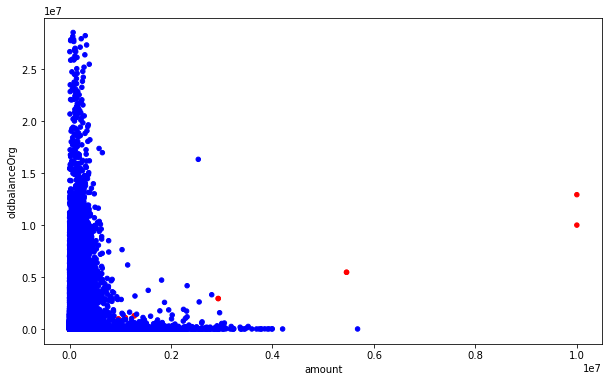

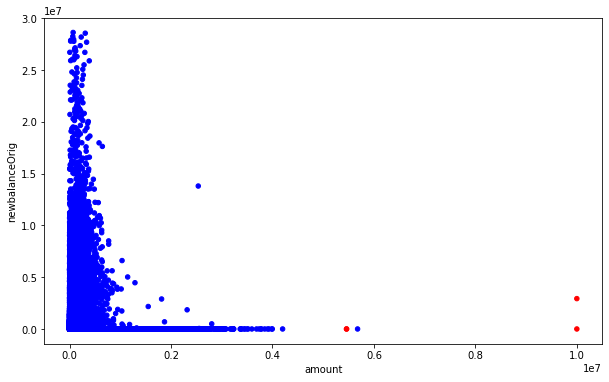

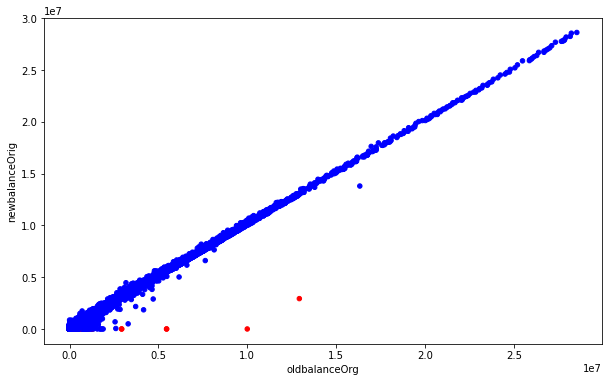

In [8]:
transactions = pd.read_csv("../data/data.csv", nrows=40_000)
tfraut_colors = transactions["isFraud"].map({0: "blue", 1: "red"})
for f_i in range(1,len(feature_list)):
     for f_j in range(f_i + 1, len(feature_list)) :        
        transactions.plot.scatter(feature_list[f_i], feature_list[f_j], c=tfraut_colors, figsize=(10, 6));

## 3 - Normalizzazione dei dati

In questo progetto non abbiamo molte pre-elaborazioni da fare, dato il numero ridotto di feature.

Per prima cosa dividiamo le feature in due categorie (perchè andranno poi trattate diversamente) :
   - Feature Numeriche : Possiamo applicare una normalizzazione dei dati per avere la stessa scala
   - Feature Categoriche : Applichiamo una categorizzazione. L'unica colonna da trattare in questo caso è 
       il tipo di transazione. Da questa operazioone de derivano altre 5.

In [9]:
feature_numeric = ["amount","oldbalanceOrg","newbalanceOrig"]
feature_categorical = ["type"]

Grazie alla classe ColumnTransformer possiamo applica entrambe queste trasformazioni in modo semplice.
L'oggeto ColumnTrasn lo memorizziamo in una variabile così lo possiamo riutilizzare anche per la creazione dei modelli nelle fasi successive

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X = transactions[feature_list]
y = transactions[["isFraud"]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

preproc = ColumnTransformer(
    [
        ("numeric",StandardScaler(),feature_numeric),
        ("categorical",OneHotEncoder(),feature_categorical)
    ],remainder="drop")

Il risultato saranno quindi le 3 colonne numeriche ("amount", "oldbalanceOrg", "newbalanceOrig") dove abbiamo applicato una normalizzazione e le 5 colonne derivate dalla trasformazione della variabile categorica type nelle sue n componenti binarie, una per ogni valore distinto di type (in questo dataset sono 5 : CASH_IN, CASH_OUT, DEBIT, PAYMENT, TRANSFER)

In [11]:
X_sample = transactions[feature_numeric + feature_categorical]
preproc.fit_transform(X_sample)
f_names = feature_numeric + list(preproc.named_transformers_["categorical"].get_feature_names())
pd.DataFrame(
    preproc.transform(X_sample),
    columns = f_names
).head(10)

,amount,oldbalanceOrg,newbalanceOrig,x0_CASH_IN,x0_CASH_OUT,x0_DEBIT,x0_PAYMENT,x0_TRANSFER
0,-0.439241,-0.266896,-0.273043,0.0,0.0,0.0,1.0,0.0
1,-0.464742,-0.331287,-0.333001,0.0,0.0,0.0,1.0,0.0
2,-0.470125,-0.340399,-0.341250,0.0,0.0,0.0,0.0,1.0
3,-0.470125,-0.340399,-0.341250,0.0,1.0,0.0,0.0,0.0
4,-0.433394,-0.322506,-0.328533,0.0,0.0,0.0,1.0,0.0
5,-0.445706,-0.317184,-0.321659,0.0,0.0,0.0,1.0,0.0
6,-0.447976,-0.261248,-0.266324,0.0,0.0,0.0,1.0,0.0
7,-0.445566,-0.264322,-0.269670,0.0,0.0,0.0,1.0,0.0
8,-0.457835,-0.339322,-0.341250,0.0,0.0,0.0,1.0,0.0
9,-0.453636,-0.322434,-0.325769,0.0,0.0,1.0,0.0,0.0


### 3.1 - PCA

Con la decomposizione SVD (Single Value Decomposition) possiamo riportare una spazio k-dimensionale in uno spazio n-dimensionale. In questo progetto le dimensioni originali sono il numero di feature dopo aver applicato il pre-processing, quindi 8, in uno spazio bidimensionale, per poter visualizzare i dati in un classico grafico cartesiano.

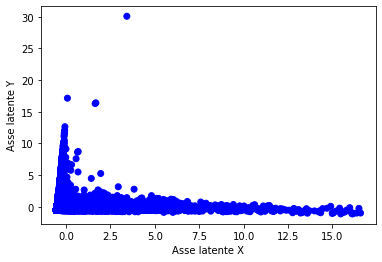

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

c_map = transactions[:X_train.values.shape[0]]["isFraud"].map({0: "blue", 1: "red"})
x_preproc = pca.fit_transform(preproc.fit_transform(X_train))

plt.scatter(x_preproc[:,0], x_preproc[:,1], c=c_map)
plt.xlabel('Asse latente X')
plt.ylabel('Asse latente Y')
plt.show()

## 4 - Modelli Predittivi

Data il grande numero di istanze in questo dataset alcuni modelli potrebbe crashare. Quindi riduciamo il dataset.

In [192]:
from sklearn.pipeline import Pipeline
transactions = pd.read_csv("../data/data.csv", nrows=20_000)
X = transactions[feature_list]
y = transactions[["isFraud"]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

Predisponaimo alcune "Utility Function" che migliorano la leggibilità del codice e riusabilità.

In [187]:
from sklearn.metrics import precision_score, recall_score, f1_score, r2_score, confusion_matrix, mean_squared_error

def print_eval_base(X, y, model, pad = 3):
    '''print eval for all model, only R^2 score '''
    print(f"R^2{''.rjust(pad, ' ')}: {model.score(X,y):12.4f}")
    return None

def print_eval_classify(X, y, model, classes):
    '''print eval for classification model'''
    y_pred = model.predict(X)    
    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix : ")
    print_matrix(classes, cm)
    print(f"\nPRECISION  : {precision_score(y, y_pred):12.4f}")
    print(f"RECALL     : {recall_score(y, y_pred):12.4f}")
    print(f"F1-MEASURE : {f1_score(y, y_pred, average='macro'):12.4f}")
    print_eval_base(X, y, model, 8)
    return None

def print_eval_neural_net(X, y, model, pad = 3):
    '''print eval for all model, only R^2 score '''
    print(f"R^2{''.rjust(pad, ' ')}: {model.evaluate(X, y):12.4f}")
    return None

def plot_separator_on_data(X, y, model=None):
    '''plot data into 2d space'''
    c_map = transactions[:X.values.shape[0]]["isFraud"].map({0: "blue", 1: "red"})
    X = np.array(X)
    plt.figure(figsize=(8, 6));
    plt.scatter(X[:, 0], X[:, 1], c=c_map)
    if model is not None:
        xlim, ylim = plt.xlim(), plt.ylim()
        sep_x = np.linspace(*xlim, 2)
        sep_y = separator_2d(model, sep_x)
        plt.plot(sep_x, sep_y, c="green", linewidth=2)
        plt.xlim(xlim)
        plt.ylim(ylim)
    return None

def separator_2d(model, x1):
    '''draw a 2d line based his equation'''
    w = model.coef_[0]
    b = model.intercept_[0]
    return -x1 * w[0] / w[1] - b / w[1]

def print_matrix(classes, matrix, pad = 10):
    '''This method prints a matrix with better formatting.
    Is used for print n x n confusion matrix'''
    for i in range(len(classes)):
        if i == 0 : 
            for c in ([" "] + classes):
                print(f"{c.rjust(pad, ' ')}",end=' ')
            print()
        for j in range(len(classes)):
            if (j == 0) : 
                print(f"{classes[i].rjust(pad, ' ')}",end=' ')
            print(f"{str(matrix[i][j]).rjust(pad, ' ')}",end=' ')
        print()
    return None

## 4.0 - Modelli di Regressione

Modelli di Regressione Implementati :
   - Kernel Ridgle Regression
   - XGBRegressor
   - CatBoost
   - LightBoost
   - Logistic Regression

### 4.0.1 - Kernel Ridgle Regression

In [189]:
from sklearn.linear_model import Ridge

model = Pipeline([
    ("preproc", preproc),
    ("regRidge", Ridge(alpha=1))
])

model.fit(X_train, y_train)
print_eval_base(X_val, y_val, model)

R^2   :       0.0345


In [190]:
from xgboost import XGBRegressor

model = Pipeline([
    ("preproc", preproc),
    ("XGBRegressor", XGBRegressor(objective='reg:squarederror', 
                    learning_rate = 0.01577, 
                    reg_lambda=0.008, 
                    reg_alpha=0.0001, 
                    n_estimators=1025))
])

model.fit(X_train, y_train)
print_eval_base(X_val, y_val, model)

R^2   :       0.3259


con XGBoost possiamo anche avere un'idea delle features che sono più o meno importatnti.

In [191]:
pd.DataFrame(
    pd.Series(model.named_steps["XGBRegressor"].feature_importances_, index=f_names).sort_values(ascending=False),
    columns = ["value"]
).T

,x0_PAYMENT,amount,oldbalanceOrg,newbalanceOrig,x0_CASH_OUT,x0_TRANSFER,x0_DEBIT,x0_CASH_IN
value,0.532877,0.176989,0.122397,0.108512,0.047564,0.011382,0.000231,0.000048


### 4.0.3 - CatBoost

In [195]:
from catboost import CatBoostRegressor

model = Pipeline([
    ("preproc", preproc),
    ("CatBoost", CatBoostRegressor(n_estimators=500,learning_rate=0.05))
])

model.fit(X_train, y_train);

0:	learn: 0.0609601	total: 6.62ms	remaining: 3.3s
1:	learn: 0.0602448	total: 12.4ms	remaining: 3.08s
2:	learn: 0.0598756	total: 18ms	remaining: 2.98s
3:	learn: 0.0592520	total: 24.3ms	remaining: 3.01s
4:	learn: 0.0588399	total: 28.7ms	remaining: 2.84s
5:	learn: 0.0584830	total: 33ms	remaining: 2.71s
6:	learn: 0.0582615	total: 36.9ms	remaining: 2.6s
7:	learn: 0.0578929	total: 40.5ms	remaining: 2.49s
8:	learn: 0.0575690	total: 44.3ms	remaining: 2.42s
9:	learn: 0.0574097	total: 47.6ms	remaining: 2.33s
10:	learn: 0.0571457	total: 50.8ms	remaining: 2.26s
11:	learn: 0.0568640	total: 53.9ms	remaining: 2.19s
12:	learn: 0.0566573	total: 57.2ms	remaining: 2.14s
13:	learn: 0.0564447	total: 60.2ms	remaining: 2.09s
14:	learn: 0.0561693	total: 63.4ms	remaining: 2.05s
15:	learn: 0.0553030	total: 66.6ms	remaining: 2.01s
16:	learn: 0.0550509	total: 69.6ms	remaining: 1.98s
17:	learn: 0.0548744	total: 72.6ms	remaining: 1.94s
18:	learn: 0.0547775	total: 75.7ms	remaining: 1.92s
19:	learn: 0.0545956	total: 

170:	learn: 0.0348867	total: 544ms	remaining: 1.05s
171:	learn: 0.0347415	total: 547ms	remaining: 1.04s
172:	learn: 0.0347288	total: 550ms	remaining: 1.04s
173:	learn: 0.0347257	total: 553ms	remaining: 1.04s
174:	learn: 0.0346995	total: 557ms	remaining: 1.03s
175:	learn: 0.0346704	total: 560ms	remaining: 1.03s
176:	learn: 0.0346358	total: 563ms	remaining: 1.03s
177:	learn: 0.0345731	total: 566ms	remaining: 1.02s
178:	learn: 0.0345535	total: 570ms	remaining: 1.02s
179:	learn: 0.0344875	total: 573ms	remaining: 1.02s
180:	learn: 0.0344544	total: 576ms	remaining: 1.01s
181:	learn: 0.0344422	total: 579ms	remaining: 1.01s
182:	learn: 0.0343777	total: 582ms	remaining: 1.01s
183:	learn: 0.0343736	total: 585ms	remaining: 1s
184:	learn: 0.0342159	total: 588ms	remaining: 1s
185:	learn: 0.0340937	total: 591ms	remaining: 998ms
186:	learn: 0.0339746	total: 595ms	remaining: 995ms
187:	learn: 0.0339326	total: 598ms	remaining: 992ms
188:	learn: 0.0338226	total: 601ms	remaining: 988ms
189:	learn: 0.0337

339:	learn: 0.0275795	total: 1.08s	remaining: 508ms
340:	learn: 0.0275453	total: 1.08s	remaining: 505ms
341:	learn: 0.0275121	total: 1.09s	remaining: 502ms
342:	learn: 0.0275058	total: 1.09s	remaining: 499ms
343:	learn: 0.0274599	total: 1.09s	remaining: 496ms
344:	learn: 0.0274310	total: 1.1s	remaining: 493ms
345:	learn: 0.0274256	total: 1.1s	remaining: 490ms
346:	learn: 0.0273933	total: 1.1s	remaining: 486ms
347:	learn: 0.0273519	total: 1.11s	remaining: 483ms
348:	learn: 0.0273284	total: 1.11s	remaining: 480ms
349:	learn: 0.0273140	total: 1.11s	remaining: 477ms
350:	learn: 0.0271749	total: 1.11s	remaining: 474ms
351:	learn: 0.0270831	total: 1.12s	remaining: 471ms
352:	learn: 0.0270561	total: 1.12s	remaining: 467ms
353:	learn: 0.0270508	total: 1.13s	remaining: 464ms
354:	learn: 0.0269823	total: 1.13s	remaining: 461ms
355:	learn: 0.0269503	total: 1.13s	remaining: 458ms
356:	learn: 0.0269243	total: 1.14s	remaining: 455ms
357:	learn: 0.0269213	total: 1.14s	remaining: 452ms
358:	learn: 0.0

In [203]:
print_eval_base(X_val, y_val, model)

R^2   :   -9720.3725


### 4.0.5 - Logistic Regression

In [205]:
from lightgbm import LGBMRegressor

model = Pipeline([
    ("preproc",preproc),
    ("LGBM", LGBMRegressor(n_estimators=1200, random_state=43))
])

model.fit(X_train, y_train.values.ravel())
print_eval_regressor(X_val, y_val, model)

MSE   :       0.0017
R^2   :       0.6172


In [206]:
### 4.0.5 - Logistic Regression

## 4.1 - Modelli di Classificazione

Dato che si tratta di un problema di classificazione binaria, proviamo ad usare per primi i modelli che fanno classificazione per poi passare ad algoritmi più avanzati. In questa sezione ho sviluppato e ottimizzato (senza grid search) i seguenti modelli :
- Alberi Decisionali
- XGBClassifier
- Support Vector Machine

### 4.1.1 - Alberi Decisionali

Confusion Matrix : 
              isFraud     Honest 
   isFraud       6629          8 
    Honest         19         11 

PRECISION  :       0.5789
RECALL     :       0.3667
F1-MEASURE :       0.7235
R^2        :       0.9960


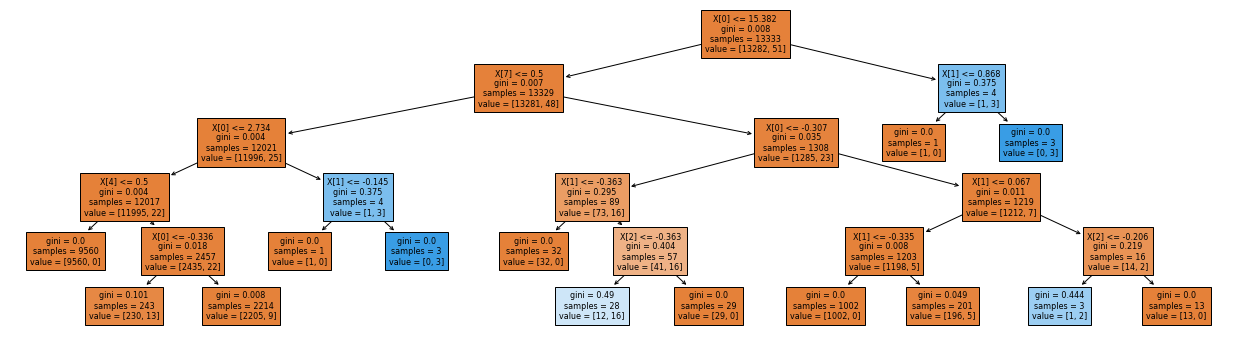

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

classes = ["isFraud", "Honest"]

model_dt = Pipeline([
    ("preproc", preproc),
    ("DecisionTreeClassifier", DecisionTreeClassifier(max_depth=5,random_state=43))
])

model_dt.fit(X_train, y_train)
print_eval_classify(X_val, y_val, model_dt, classes)

plt.figure(figsize=(22, 6))
plot_tree(model_dt.named_steps["DecisionTreeClassifier"], max_depth=5, filled=True, fontsize=8);

I DecisionTree funzionano molto meglio dei modelli di regressione.

Vediamo quali spit fa stampando in maniera testuale l'albero di classificazione :

In [16]:
from sklearn.tree import export_text
print(export_text(model_dt.named_steps["DecisionTreeClassifier"], feature_names=f_names))

|--- amount <= 15.38
|   |--- x0_TRANSFER <= 0.50
|   |   |--- amount <= 2.73
|   |   |   |--- x0_CASH_OUT <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- x0_CASH_OUT >  0.50
|   |   |   |   |--- amount <= -0.34
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amount >  -0.34
|   |   |   |   |   |--- class: 0
|   |   |--- amount >  2.73
|   |   |   |--- oldbalanceOrg <= -0.15
|   |   |   |   |--- class: 0
|   |   |   |--- oldbalanceOrg >  -0.15
|   |   |   |   |--- class: 1
|   |--- x0_TRANSFER >  0.50
|   |   |--- amount <= -0.31
|   |   |   |--- oldbalanceOrg <= -0.36
|   |   |   |   |--- class: 0
|   |   |   |--- oldbalanceOrg >  -0.36
|   |   |   |   |--- newbalanceOrig <= -0.36
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- newbalanceOrig >  -0.36
|   |   |   |   |   |--- class: 0
|   |   |--- amount >  -0.31
|   |   |   |--- oldbalanceOrg <= 0.07
|   |   |   |   |--- oldbalanceOrg <= -0.34
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- oldbalanceOrg >

### 4.1.2 - XGBClassifier

In [180]:
from xgboost import XGBClassifier 

model_xgb = Pipeline([
    ("preproc", preproc),
    ("XGBClassifier",
         XGBClassifier(objective='reg:squarederror', 
            learning_rate = 0.01577, reg_lambda=0.008, reg_alpha=0.0001, n_estimators=1025,use_label_encoder =False))
])
model_xgb.fit(X_train, y_train.values.ravel())
print_eval_classify(X_val, y_val, model_xgb, classes)

Confusion Matrix : 
              isFraud     Honest 
   isFraud      66606         11 
    Honest         27         23 

PRECISION  :       0.6765
RECALL     :       0.4600
F1-MEASURE :       0.7737
R^2        :       0.9994


## 4.2 - Neural Network

Proviamo ora ad implementare un modello neurale e vedere se può risolvere anche lui il problema

Prima di procedere assicurarsi di aver installato la libreria TensorFlow.

In [18]:
#%conda install TensorFlow

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall

X_train_nn = preproc.fit_transform(X_train)
X_val_nn = preproc.transform(X_val)

model_nn = Sequential([
    Dense(8, activation="relu", input_dim=8),
    Dense(1)
])
model_nn.summary()
model_nn.compile(optimizer="adam", loss="mse")
fit_history = model_nn.fit(X_train_nn, y_train, batch_size=10, epochs=15)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
1334/1334 [==============================] - 2s 1ms/step - loss: 0.0102
Epoch 2/15
1334/1334 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 3/15
1334/1334 [==============================] - 1s 965us/step - loss: 0.0037
Epoch 4/15
1334/1334 [==============================] - 1s 910us/step - loss: 0.0036
Epoch 5/15
1334/1334 [==============================] - 1s 1ms/step - loss: 0.0036
Epoch 6/15
1334/1334 [===============

In [20]:
print_eval_neural_net(X_val_nn, y_val, model_nn)

209/209 [==============================] - 0s 2ms/step - loss: 0.0040
R^2   :       0.0040


Vediamo come possiamo grafica le misure d'errore

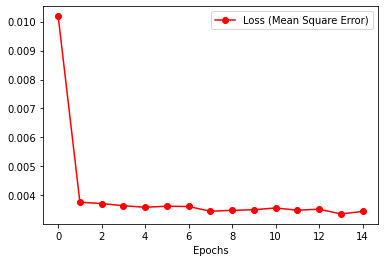

In [21]:
plt.plot(fit_history.history["loss"], "ro-")
plt.legend(["Loss (Mean Square Error)"])
plt.xlabel("Epochs");

grazie alla classe KerasRegressor possiamo usare le potenzialità di Kerar unite al concetto di Pipeline, GridSearh ecc..
di scikit-lean

In [22]:
def build_nn(nodes, inpDim):
    model = Sequential([
        Dense(nodes, activation="relu", input_dim=inpDim),
        Dense(256, activation="relu"),
        Dense(256, activation="relu"),
        Dense(64, activation="relu"),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mean_squared_error")
    model.summary()
    return model

In [23]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

model = Pipeline([
    ("preproc", preproc),
    # epochs=100
    ("NN", KerasRegressor(build_fn=build_nn, nodes=128, inpDim=8, epochs=10, batch_size=10))
])
model.fit(X_train, y_train);

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               1152      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 116,481
Trainable params: 116,481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


C:\Users\Federico\AppData\Local\Temp/ipykernel_14648/1404871188.py:5: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ("NN", KerasRegressor(build_fn=build_nn, nodes=128, inpDim=8, epochs=100, batch_size=10))


1334/1334 [==============================] - 2s 1ms/step - loss: 0.0041
Epoch 2/100
1334/1334 [==============================] - 2s 1ms/step - loss: 0.0038
Epoch 3/100
1334/1334 [==============================] - 2s 1ms/step - loss: 0.0036
Epoch 4/100
1334/1334 [==============================] - 2s 1ms/step - loss: 0.0038
Epoch 5/100
1334/1334 [==============================] - 2s 1ms/step - loss: 0.0036
Epoch 6/100
1334/1334 [==============================] - 2s 1ms/step - loss: 0.0036
Epoch 7/100
1334/1334 [==============================] - 2s 2ms/step - loss: 0.0036
Epoch 8/100
1334/1334 [==============================] - 2s 1ms/step - loss: 0.0040
Epoch 9/100
1334/1334 [==============================] - 2s 1ms/step - loss: 0.0034
Epoch 10/100
1334/1334 [==============================] - 2s 1ms/step - loss: 0.0036
Epoch 11/100
1334/1334 [==============================] - 2s 1ms/step - loss: 0.0035
Epoch 12/100
1334/1334 [==============================] - 2s 1ms/step - loss: 0.0036
E

1334/1334 [==============================] - 2s 1ms/step - loss: 0.0031
Epoch 98/100
1334/1334 [==============================] - 2s 1ms/step - loss: 0.0031
Epoch 99/100
1334/1334 [==============================] - 2s 1ms/step - loss: 0.0031
Epoch 100/100
1334/1334 [==============================] - 2s 1ms/step - loss: 0.0031


In [182]:
print_eval_base(X_val, y_val, model)

6667/6667 [==============================] - 10s 1ms/step - loss: 9.2717e-04
R^2   :      -0.0009


## 5 - Tuning degli Iperparametri

Per questa parte utilizziamo una porzione più ampia del datataset

In questa parte andremo ad suddividere il dataset in 3 parti e le useremo nel seguente modo :
   - Training Set : Per addestrare i modelli
   - Validation Set : Per vericare l'accuratteza dei modelli su dati mai visti in fase di training
   - Test Set : Per calcolare la confidenza

In [30]:
from sklearn.model_selection import GridSearchCV, KFold
kf = KFold(3, shuffle=True, random_state=42)

transactions = pd.read_csv("../data/data.csv", nrows=200_000)
X = transactions[feature_list]
y = transactions[["isFraud"]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=1/3, random_state=42)

I modelli che meglio si sono comportati per questo esperimento sono stati, come ci si poteva aspettare,
i modelli di classificazione. Andiamo quindi a cercare i migliori iperparametri per i seguenti modelli : 
 - Alberi Decisionali
 - XGBClassifier

In [31]:
grid = {
    "DecisionTreeClassifier__max_depth": [5,10]
}

gs = GridSearchCV(model_dt, grid, cv=kf)
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_DecisionTreeClassifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.100068,0.010936,0.011635,0.000470,5,{'DecisionTreeClassifier__max_depth': 5},0.999393,0.999089,0.999392,0.999291,0.000143,1
1,0.141145,0.004689,0.012300,0.000471,10,{'DecisionTreeClassifier__max_depth': 10},0.999224,0.999021,0.999392,0.999212,0.000152,2


In [181]:
grid = {
    "XGBClassifier__n_estimators": [10,20,30]
}

gs = GridSearchCV(model_xgb, grid, cv=kf)
gs.fit(X_train, y_train.values.ravel())
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_XGBClassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.336101,0.025073,0.030252,0.000470,10,{'XGBClassifier__n_estimators': 10},0.999291,0.999089,0.999392,0.999257,0.000126,1
1,0.594743,0.031845,0.030258,0.000944,20,{'XGBClassifier__n_estimators': 20},0.999291,0.998987,0.999392,0.999224,0.000172,2
2,0.831111,0.043368,0.030918,0.000814,30,{'XGBClassifier__n_estimators': 30},0.999291,0.998886,0.999392,0.999190,0.000219,3


## 6 - Conclusioni 

Possiamo stimare l'accuratezza sui nuovi dati con un processo Bernoulliano :

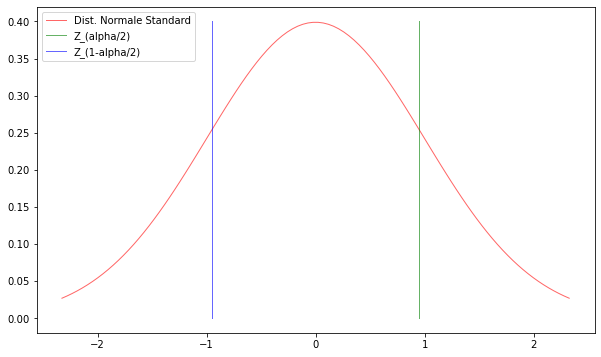

In [172]:
from scipy.stats import norm
    
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
y = norm.pdf(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'r-', lw=1, alpha=0.6, label='Dist. Normale Standard')
x = [0.95]*100
y = np.linspace(0.0,0.4,100)
plt.plot(x, y, 'g-', lw=1, alpha=0.6, label='Z_(alpha/2)')
x = [-0.95]*100
plt.plot(x, y, 'b-', lw=1, alpha=0.6, label='Z_(1-alpha/2)');
plt.legend(loc='upper left')
plt.show()

In [173]:
def bernoulli_process(acc, alpha, N) :
    '''this method calculate the interval coinfidence based on Bernoulli Process'''
    p_value = 1 - alpha
    Za2 = 0.0
    
    if p_value == 0.99 :
        Za2 = 2.58
    elif p_value == 0.98 :
        Za2 = 2.33
    elif p_value == 0.95 :
        Za2 = 1.96
    elif p_value == 0.90 :
        Za2 = 1.65
    
    num = 2*N*acc+Za2**2
    sqrt = np.sqrt(Za2**2+4*N*acc-4*N*acc**2)
    den = 2*(N+Za2**2)
    
    return (num - Za2*sqrt) / den, (num + Za2*sqrt) / den

In [174]:
accurancy = gs.best_estimator_.score(X_test, y_test)
N = X_test.shape[0]
p_min, p_max = bernoulli_process(accurancy, 0.05, N)
p_min, p_max, accurancy = p_min * 100, p_max * 100, accurancy * 100
print(f"L'accuratezza del modello migliore è :\n{accurancy:2.2f} % \u00B1 [{p_min:2.2f} %, {p_max:2.2f} %]")

L'accuratezza del modello migliore è :
99.92 % ± [99.89 %, 99.94 %]


## 7 - Link alle risorse
#### Link al dataset di kaggle
https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset